# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,291.073273,293.880804,290.066420,292.293083,1963682
1,2010-01-05,291.150635,294.132431,289.098238,292.370468,2014488
2,2010-01-06,284.567474,291.286201,283.851079,291.150651,3349176
3,2010-01-07,276.648254,286.329394,275.331610,284.819127,6474892
4,2010-01-08,270.994476,278.235974,269.716571,277.267860,6048178


In [5]:
# Check if 'Adj Close' column exists before attempting to drop it
if 'Adj Close' in df.columns:
    df = df.drop(['Date', 'Adj Close'], axis=1)
else:
    print("Column 'Adj Close' not found in the DataFrame.")
    # You might want to add specific handling for this case
    # For example, if 'Adj Close' is already dropped, you can simply continue with the code

Column 'Adj Close' not found in the DataFrame.


Visualizing Closing Price

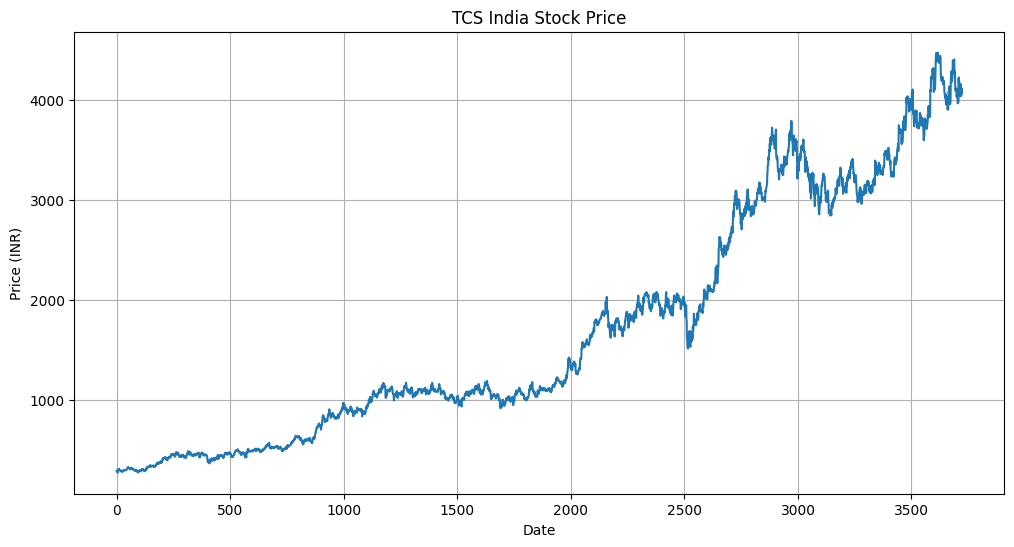

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [7]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,291.073273,293.880804,290.066420,292.293083,1963682
1,2010-01-05,291.150635,294.132431,289.098238,292.370468,2014488
2,2010-01-06,284.567474,291.286201,283.851079,291.150651,3349176
3,2010-01-07,276.648254,286.329394,275.331610,284.819127,6474892
4,2010-01-08,270.994476,278.235974,269.716571,277.267860,6048178
...,...,...,...,...,...,...
3719,2025-01-28,4040.300049,4102.000000,4028.300049,4070.800049,2468272
3720,2025-01-29,4099.799805,4107.850098,4054.000000,4054.000000,1217089
3721,2025-01-30,4100.049805,4129.899902,4058.500000,4099.899902,1531251


# Plotting moving averages of 100 day

---



In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3719,4158.027378
3720,4155.075405
3721,4152.314463
3722,4149.747720


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

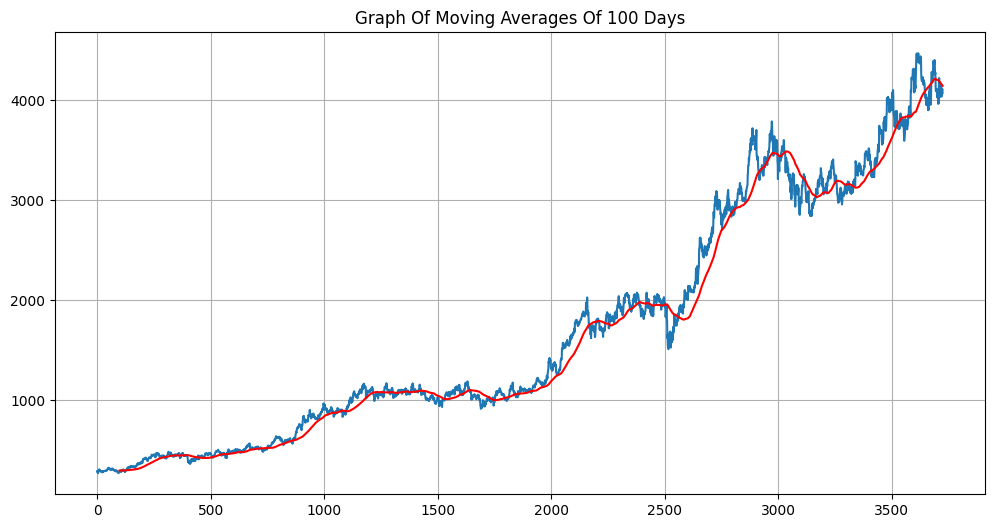

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3719,4062.535837
3720,4063.843362
3721,4064.966862
3722,4066.070659


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

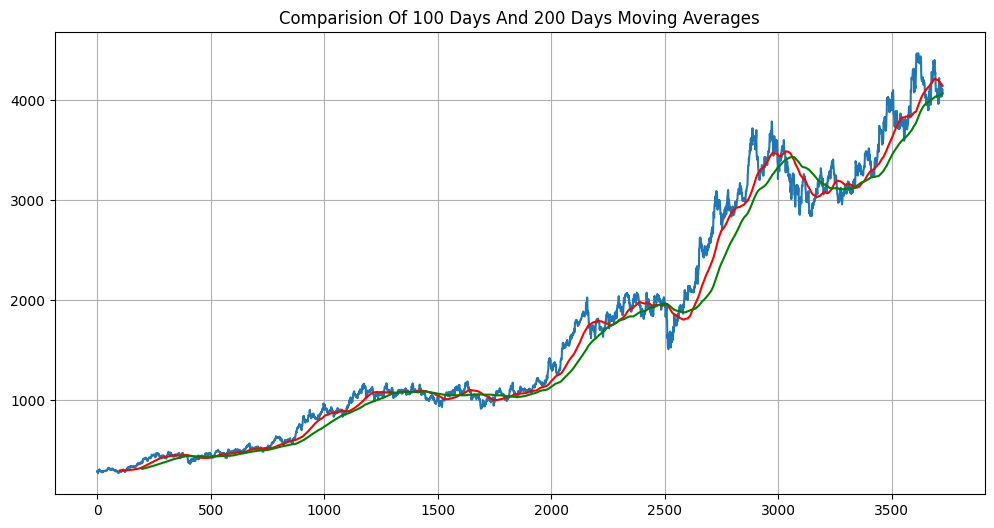

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
df.shape

(3724, 6)

# Spliting the dataset into training (70%) and testing (30%) set

In [13]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2606, 6)
(1118, 6)


In [14]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,291.073273,293.880804,290.066420,292.293083,1963682
1,2010-01-05,291.150635,294.132431,289.098238,292.370468,2014488
2,2010-01-06,284.567474,291.286201,283.851079,291.150651,3349176
3,2010-01-07,276.648254,286.329394,275.331610,284.819127,6474892
4,2010-01-08,270.994476,278.235974,269.716571,277.267860,6048178


In [15]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2606,2020-07-31,2118.865234,2168.460973,2096.621559,2139.065691,4723290
2607,2020-08-03,2093.555908,2139.715277,2071.776618,2127.269807,4012337
2608,2020-08-04,2089.423096,2107.951739,2066.529343,2098.942848,2927928
2609,2020-08-05,2098.525391,2136.140030,2092.488473,2098.989769,3800641
2610,2020-08-06,2143.662842,2154.250575,2103.958504,2112.920913,4748047


# Using MinMax scaler for normalization of the dataset

---



In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [18]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.0105987 ],
       [0.0106404 ],
       [0.0099832 ],
       ...,
       [0.9614706 ],
       [1.        ],
       [0.99694758]])

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(2506, 100, 1)

# ML Model (LSTM)

---



In [21]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [24]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 105ms/step - loss: 0.0923 - mean_absolute_error: 0.2124
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0094 - mean_absolute_error: 0.0665
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0086 - mean_absolute_error: 0.0617
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0075 - mean_absolute_error: 0.0599
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0066 - mean_absolute_error: 0.0561
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0060 - mean_absolute_error: 0.0544
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0059 - mean_absolute_error: 0.0500
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0050 - mean_absolute_error: 0.0482
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0057 - mean_absolute_error: 0.0503
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0052 - mean_absolute_error: 0.0503
Epoch 11/100
79/79 ━━━━━━━━

In [25]:
model.save('keras_model.h5')

In [26]:
test_close.shape

(1118, 1)

In [27]:
past_100_days = pd.DataFrame(train_close[-100:])

In [28]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [32]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [33]:
final_df.head()

,0
0,1885.886029
1,1913.128759
2,1924.411195
3,1903.313833
4,1773.063182


In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.14572853],
       [0.15465433],
       [0.1583509 ],
       ...,
       [0.87112715],
       [0.87443635],
       [0.87541926]])

In [35]:
input_data.shape

(1218, 1)

# Testing the model

---



In [36]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1118, 100, 1)
(1118,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [38]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step


In [39]:
y_pred.shape

(1118, 1)

In [40]:
y_test

array([0.22868022, 0.22481542, 0.21553439, ..., 0.87112715, 0.87443635,
       0.87541926])

In [ ]:
y_pred

array([[0.25775522],
       [0.2574226 ],
       [0.25603193],
       [0.25378746],
       [0.25095484],
       [0.24779236],
       [0.24466789],
       [0.24181482],
       [0.23931277],
       [0.23710254],
       [0.2350855 ],
       [0.23319581],
       [0.23144434],
       [0.22995044],
       [0.22890475],
       [0.22854826],
       [0.22912493],
       [0.23062554],
       [0.23290583],
       [0.23570824],
       [0.23884568],
       [0.24215785],
       [0.24578443],
       [0.2500002 ],
       [0.2548138 ],
       [0.2601531 ],
       [0.2659192 ],
       [0.2719805 ],
       [0.27820012],
       [0.2844245 ],
       [0.29052013],
       [0.2963118 ],
       [0.30160153],
       [0.30622107],
       [0.30994543],
       [0.3126263 ],
       [0.31429124],
       [0.3150097 ],
       [0.3149148 ],
       [0.31381044],
       [0.31146136],
       [0.30747977],
       [0.30172443],
       [0.29434383],
       [0.28587353],
       [0.27711836],
       [0.2686513 ],
       [0.260

In [41]:
scaler.scale_

array([0.00032764])

In [42]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

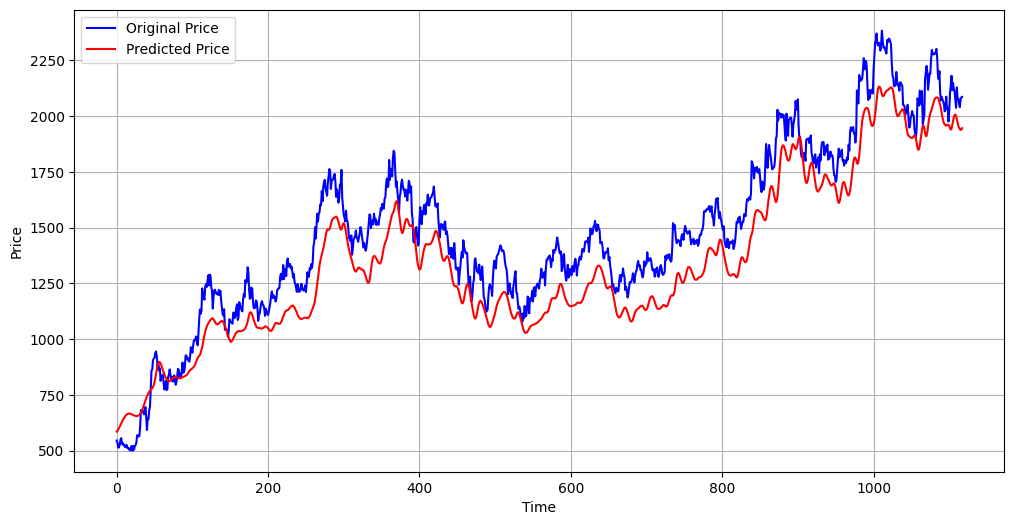

In [43]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [44]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 9.80%


Calculation of R2 score

In [45]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8348184645875057


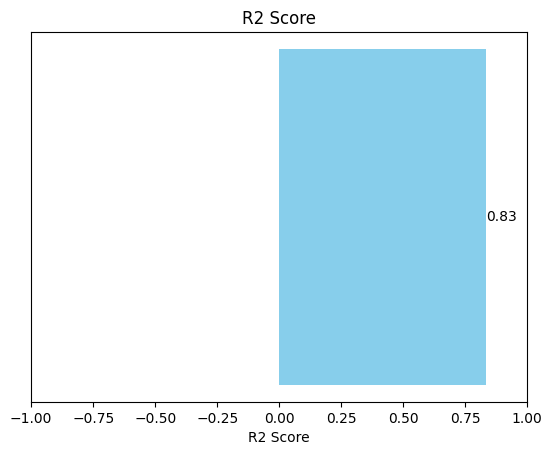

In [46]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

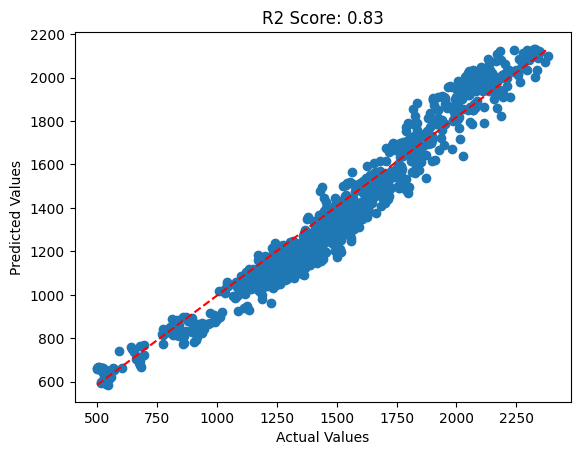

In [47]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()